Lets now look into classification.

Some of the examples are from [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). 

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

More on the Dataset: https://ai.stanford.edu/~amaas/data/sentiment/

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 1s 0us/step


In [ ]:
train_data[0]

In [50]:
train_labels[0]
type(train_labels[0])

numpy.int64

In [4]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [46]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

decoded_review

"? ? ? to just br loved and you i've set and broke many was friends seems him see of how and with movies a with know that him see people film guess are of if the some to okay from without old a though a into in that film thing in that of if is scarecrow outside days a found a looks in that film these about in that was to thought 100 him see good he without be all man a character that as it"

### Preparing the data

What is the problem with this data as it is? We have list of intigers. Each element as long as a given review.  
IMDB Dataset: https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset?msclkid=67c2fdb7c66911ec9c14c87c755eca0a

**Encoding the integer sequences via multi-hot encoding**

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

What are we loosing here?  
What have we lost with that encoding?

In [47]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [52]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

y_train[0]

3.0

### Building your model

**Model definition**

**Thoughts and tips**  
This data is made of binary inputs and one number, scalar outputs. This is a rare and friendly set up.  
For this we use dense layers with relu activations. Sigmoid gets the score back to [0,1] for probability.  
What about loss? Crossentropy is best for probability problems.  
Rmsprop optimizer is a good start for every problem.

In [53]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [10]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Try mean_squared_error!  
Change the architecture of the network.  
Do you have any questions regarding this... guessing match?

### Validating your approach

**Setting aside a validation set**

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 8s 219ms/step - loss: 0.5741 - accuracy: 0.7307 - val_loss: 0.4402 - val_accuracy: 0.8687
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3465 - accuracy: 0.8959 - val_loss: 0.3239 - val_accuracy: 0.8851
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2383 - accuracy: 0.9255 - val_loss: 0.2966 - val_accuracy: 0.8834
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1866 - accuracy: 0.9394 - val_loss: 0.2962 - val_accuracy: 0.8811
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1463 - accuracy: 0.9559 - val_loss: 0.3266 - val_accuracy: 0.8735
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1208 - accuracy: 0.9632 - val_loss: 0.3098 - val_accuracy: 0.8826
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1025 - accuracy: 0.9675 - val_loss: 0.3134 - val_accuracy: 0.8837
Epoch 8/20
3

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

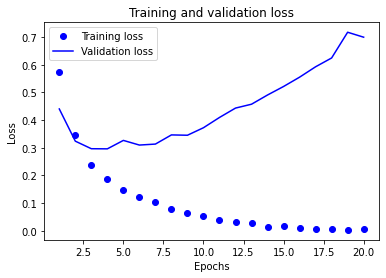

In [14]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

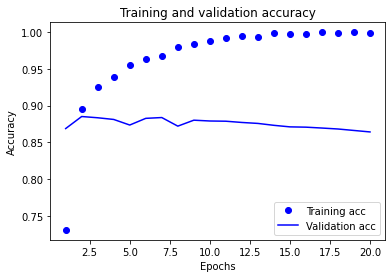

In [15]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 15ms/step - loss: 0.4591 - accuracy: 0.8268
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2695 - accuracy: 0.9075
Epoch 3/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2038 - accuracy: 0.9289
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3064 - accuracy: 0.8788


In [17]:
results

[0.3063945472240448, 0.8787599802017212]

### Using a trained model to generate predictions on new data

In [18]:
model.predict(x_test)

array([[0.14571956],
       [0.9998397 ],
       [0.7594923 ],
       ...,
       [0.09724262],
       [0.05637246],
       [0.4517556 ]], dtype=float32)

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

More on the Dataset, cool explained example: https://martin-thoma.com/nlp-reuters/

In [19]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [20]:
len(train_data)

8982

In [21]:
len(test_data)

2246

In [22]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [54]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [24]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [25]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

So any idea what to do with the labels?

In [26]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [55]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Building your model

**Model definition**

Now we have way more classes to work with, and way more info that needs to diffrenciate between the data points.  
We need more neurons.  

In [28]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [29]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [30]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [31]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 48ms/step - loss: 2.7815 - accuracy: 0.4308 - val_loss: 1.8570 - val_accuracy: 0.6280
Epoch 2/20
16/16 [==============================] - 0s 29ms/step - loss: 1.4956 - accuracy: 0.7020 - val_loss: 1.3316 - val_accuracy: 0.7210
Epoch 3/20
16/16 [==============================] - 1s 32ms/step - loss: 1.0693 - accuracy: 0.7741 - val_loss: 1.1291 - val_accuracy: 0.7630
Epoch 4/20
16/16 [==============================] - 1s 35ms/step - loss: 0.8338 - accuracy: 0.8291 - val_loss: 1.0247 - val_accuracy: 0.7810
Epoch 5/20
16/16 [==============================] - 1s 33ms/step - loss: 0.6609 - accuracy: 0.8646 - val_loss: 0.9658 - val_accuracy: 0.7950
Epoch 6/20
16/16 [==============================] - 1s 33ms/step - loss: 0.5256 - accuracy: 0.8949 - val_loss: 0.9092 - val_accuracy: 0.8230
Epoch 7/20
16/16 [==============================] - 1s 34ms/step - loss: 0.4226 - accuracy: 0.9119 - val_loss: 0.8971 - val_accuracy: 0.8190
Epoch 8/20
16

**Plotting the training and validation loss**

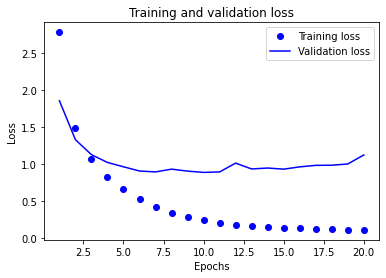

In [32]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

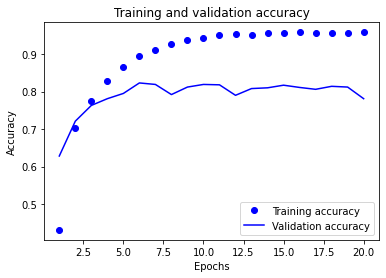

In [33]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [34]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 26ms/step - loss: 2.6377 - accuracy: 0.5171
Epoch 2/9
18/18 [==============================] - 0s 25ms/step - loss: 1.4260 - accuracy: 0.6991
Epoch 3/9
18/18 [==============================] - 0s 26ms/step - loss: 1.0481 - accuracy: 0.7799
Epoch 4/9
18/18 [==============================] - 0s 25ms/step - loss: 0.8213 - accuracy: 0.8249
Epoch 5/9
18/18 [==============================] - 0s 25ms/step - loss: 0.6494 - accuracy: 0.8613
Epoch 6/9
18/18 [==============================] - 0s 27ms/step - loss: 0.5155 - accuracy: 0.8922
Epoch 7/9
18/18 [==============================] - 1s 28ms/step - loss: 0.4165 - accuracy: 0.9127
Epoch 8/9
18/18 [==============================] - 0s 26ms/step - loss: 0.3423 - accuracy: 0.9272
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9661 - accuracy: 0.7841


In [35]:
results

[0.9661357402801514, 0.784060537815094]

In [36]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.182546749777382

### Generating predictions on new data

In [37]:
predictions = model.predict(x_test)

In [38]:
predictions[0].shape

(46,)

In [39]:
np.sum(predictions[0])

1.0

In [40]:
np.argmax(predictions[0])

3

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [43]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 20ms/step - loss: 2.7647 - accuracy: 0.4342 - val_loss: 2.0372 - val_accuracy: 0.5670
Epoch 2/20
63/63 [==============================] - 1s 14ms/step - loss: 1.7203 - accuracy: 0.5960 - val_loss: 1.6272 - val_accuracy: 0.6150
Epoch 3/20
63/63 [==============================] - 1s 15ms/step - loss: 1.4170 - accuracy: 0.6486 - val_loss: 1.4995 - val_accuracy: 0.6440
Epoch 4/20
63/63 [==============================] - 1s 16ms/step - loss: 1.2546 - accuracy: 0.6688 - val_loss: 1.4457 - val_accuracy: 0.6460
Epoch 5/20
63/63 [==============================] - 1s 17ms/step - loss: 1.1503 - accuracy: 0.7097 - val_loss: 1.4674 - val_accuracy: 0.6600
Epoch 6/20
63/63 [==============================] - 1s 16ms/step - loss: 1.0784 - accuracy: 0.7300 - val_loss: 1.4540 - val_accuracy: 0.6690
Epoch 7/20
63/63 [==============================] - 1s 16ms/step - loss: 1.0175 - accuracy: 0.7398 - val_loss: 1.4807 - val_accuracy: 0.6690
Epoch 8/20
63